In [290]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns


In [291]:
Customer_ID = pd.read_csv("/Users/yiningliu/Downloads/DataSets-main/customer_ID.csv").dropna()
City = pd.read_csv("/Users/yiningliu/Downloads/DataSets-main/City.csv").dropna()
Cab_Data = pd.read_csv("/Users/yiningliu/Downloads/DataSets-main/Cab_Data.csv").dropna()
Transaction_ID = pd.read_csv("/Users/yiningliu/Downloads/DataSets-main/Transaction_ID.csv").dropna()

In [292]:
City

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [293]:
#Customer_ID

In [294]:
#Transaction_ID

In [295]:
#Cab_Data

Assumption 1: 

Will the consumers choose different cab companies on different dates of travel?

<AxesSubplot:xlabel='Company', ylabel='Date of Travel'>

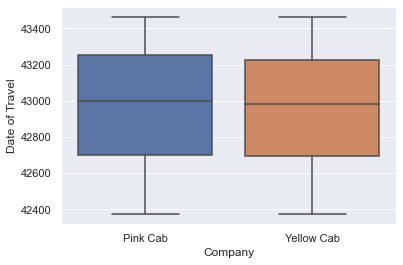

In [234]:
sns.boxplot(x = "Company", y = "Date of Travel", data = Cab_Data)

From the plot above we can see that the median, upper/lower interquartile are pretty similar. And the boundary of maximum and minimum value are at the same level. So there is no relation between the date of travel and the cab companies chosen, which means that consumers take taxi randomly without much special preference on the companies.

Then we can merge the 3 files into a single csv form。

In [244]:
Cab_Trans = pd.merge(Cab_Data, Transaction_ID, how='left', on=['Transaction ID', 'Transaction ID'])
 
merged = pd.merge(Cab_Cust, Customer_ID, how='left', on=['Customer ID', 'Customer ID'])

merged

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423


Assumption 2: 

Whether the PRICE people are willing to pay for a cab ride is related to the GENDER and AGE of the passenger

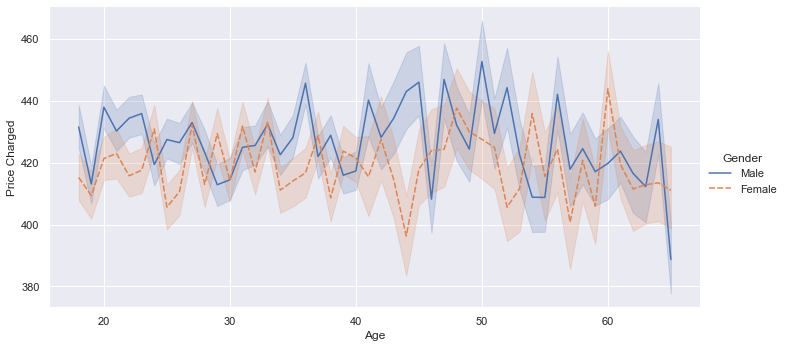

In [236]:
sns.relplot(x="Age", y="Price Charged", hue="Gender", style="Gender", 
            kind = "line", aspect = 1 * 2, data = merged);

From the plot above we can observe that generally male are more likely to pay a higher price on each taxi ride no matter the age group. And there is also a slight trend that elder people would not like to spend more on a cab ride than the younger people.

 Assumption 3: 
 
 The unit price per kilometer for a cab drive is dependent on then economic development.
 The higher the development level, the higher the unit price would be.

In [237]:
merged["Unit Price"] = merged["Price Charged"]/merged["KM Travelled"]
merged

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Unit Price
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,12.182266
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,12.526904
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,13.849558
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,11.377751
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,13.129439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,14.425000
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,13.541667
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,15.750270
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,16.612500


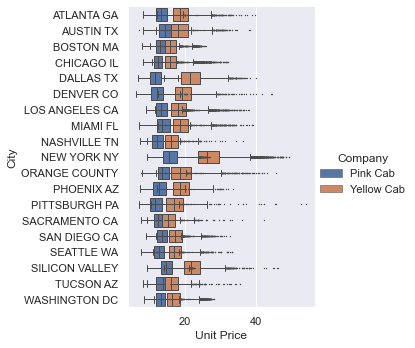

In [238]:
sns.catplot(x="Unit Price", y="City", hue="Company", kind="box", dodge=False, 
            orient = "h", linewidth = 1, fliersize = 0.5, data = merged)

From the boxplot above, it is obvious that in all cities the price per kilometer of Yellow Cab is much higher than that in Pink Cab. 

In addition, unit price of cab rides in New York city is much higher than the prices in other cities, which makes sense since it is one of the most developed city in this world so there's a higher traffic demand and the cost of everything is New York is just higher than other cities. 

And we can also see that large cities like dallas silicon valley have higher unit price for the same reason above.

So our assumption is right. Higher development level means that it's more expensive for a taxi ride.

Assumption 4: 

The number of customers in different cities of the two companies in relation to the local economic situation

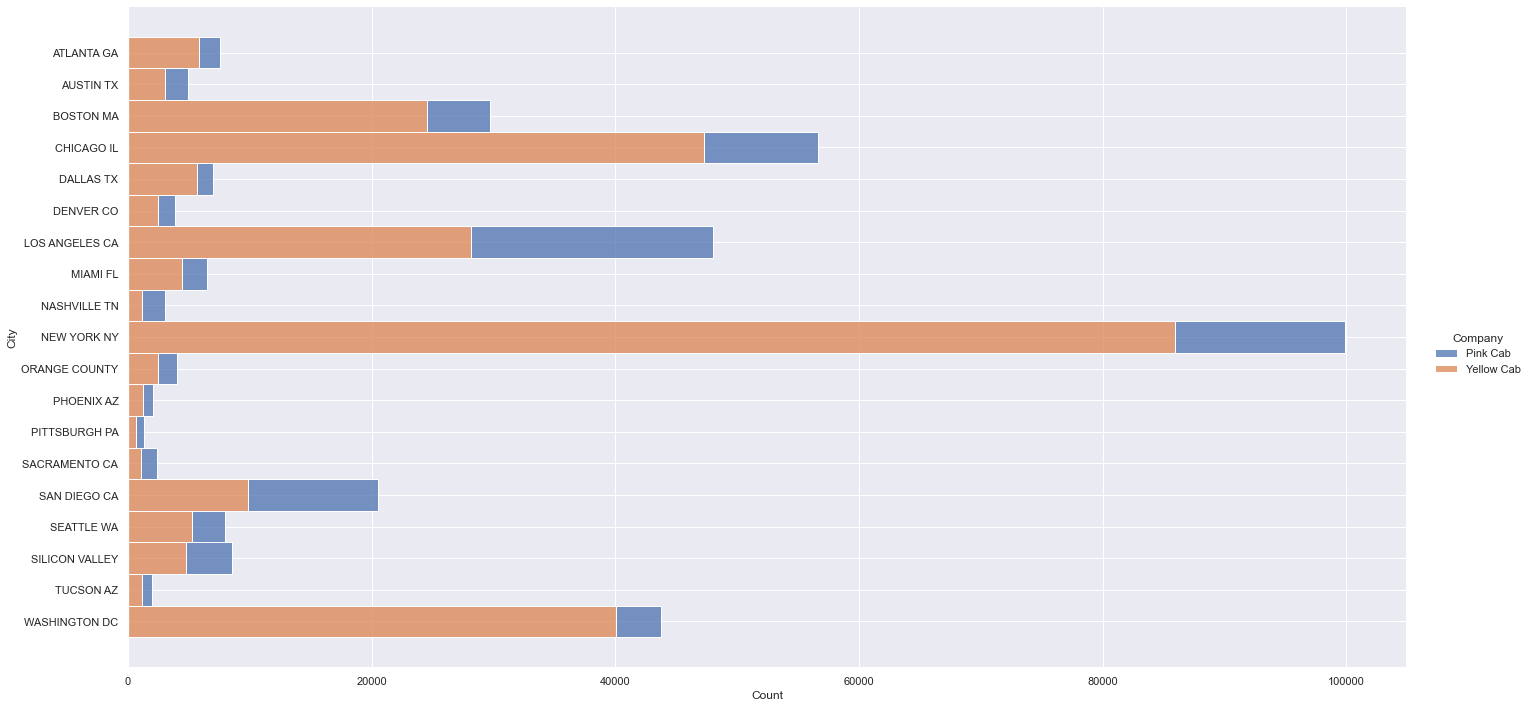

In [239]:
sns.displot(merged, y = merged["City"], hue="Company", multiple="stack", aspect = 2, height = 10)

From the histogram above we can easily point out that in most of the cities, the costumer volume of Yellow Cab is much greater than that of the Pink Cab.
But there are also 2 exceptions: Nashiville, Sacramento. In San Diego, 2 companies have the similar customer volume.

Assumption 5: 
In different states, is there a difference in price acceptance between the different genders of passengers？

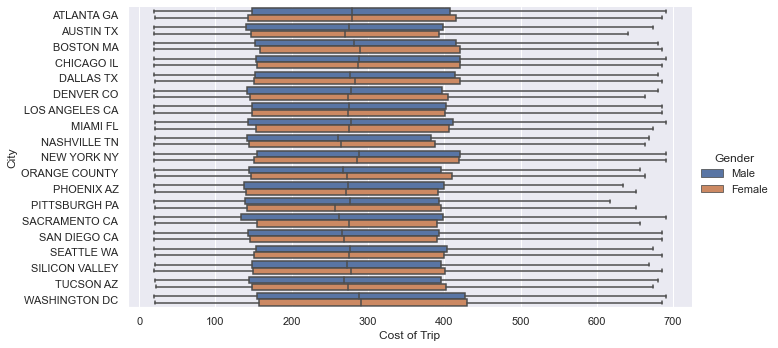

In [240]:
sns.catplot(y="City", x="Cost of Trip", hue="Gender", kind="box", data=merged, orient = "h", aspect = 2 * 1)

From the plot above we can see that in different states, there shows no obvious tendencies that passenger in different genders have different acceptability on the price of each taxi ride.
Gender is not a factor deciding the price a passenger would pay for a taxi drive.

Assumption 6: 

The 2 cab companies have different profitability rates on different payment method.

In [251]:
merged["Profit Rate"] = (merged["Price Charged"]-merged["Cost of Trip"])/merged["Price Charged"]

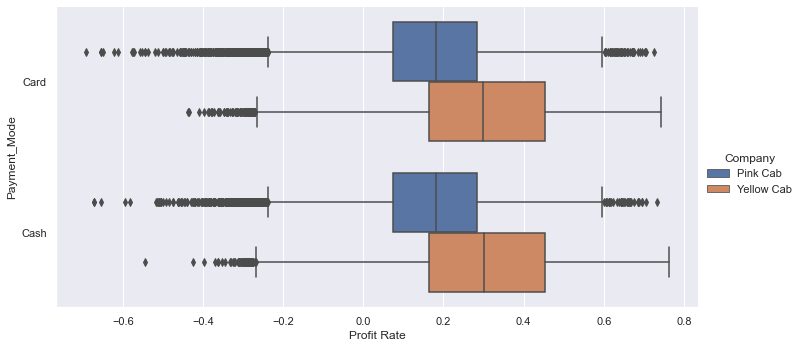

In [254]:
sns.catplot(y="Payment_Mode", x="Profit Rate", hue="Company", kind="box", data=merged, orient = "h", aspect = 2 * 1)

From the boxplot above we can observe that generally payment method does NOT affect the profit rate of each company.
But generally speaking Yellow Cab makes more money than Pink Cab, whcih mean that the Yellow Cab has a higher profit rate.

Then we check this idea state-wisely:

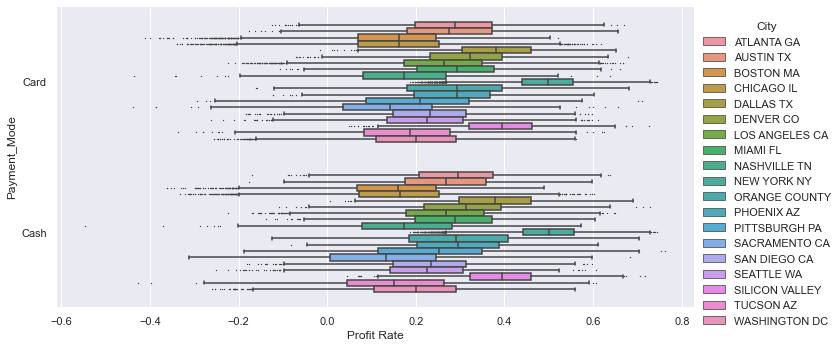

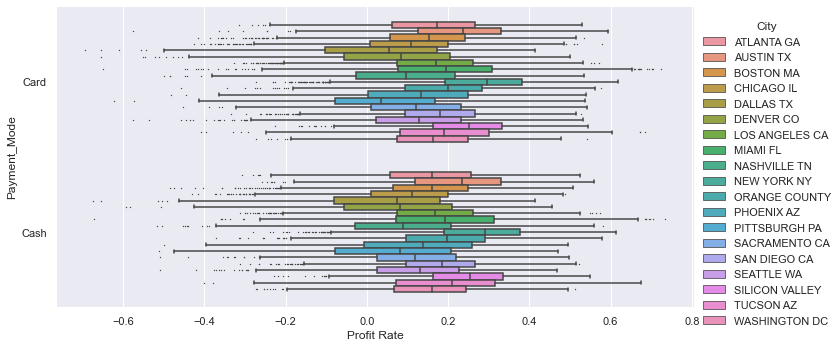

In [289]:
sns.catplot(y="Payment_Mode", x="Profit Rate", hue="City", kind="box"
            , data = merged[(merged['Company'] == "Yellow Cab")]
            , orient = "h", aspect = 2 * 1, fliersize = 0.5)

sns.catplot(y="Payment_Mode", x="Profit Rate", hue="City", kind="box"
            , data = merged[(merged['Company'] == "Pink Cab")]
            , orient = "h", aspect = 2 * 1, fliersize = 0.5)

Obvious that the patterns have no difference.